In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import pylab as pylab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import sem


In [3]:
#read file 
orig_file = pd.read_csv("police_fatal_shootings.csv")
clean_file = orig_file [["date", "armed", "threat_level","age", "gender", "race", "state", 
                         "signs_of_mental_illness", "flee", "body_camera"]]
clean_file = clean_file.rename(columns={"date":"Date", 
                                        "armed":"Armed", 
                                        "threat_level":"Threat",
                                        "age":"Age", 
                                        "gender":"Gender", 
                                        "race":"Race", 
                                        "state":"State",
                                        "signs_of_mental_illness": "Sign of Mental Illness", 
                                        "flee":"Flee", 
                                        "body_camera": "Body Camera"})

clean_file.head()

,Date,Armed,Threat,Age,Gender,Race,State,Sign of Mental Illness,Flee,Body Camera
0,12/21/2017,unarmed,other,6.0,M,W,TX,False,Not fleeing,False
1,1/6/2015,unarmed,other,34.0,F,W,IA,False,Not fleeing,True
2,1/11/2016,unarmed,other,12.0,F,W,PA,False,Not fleeing,False
3,9/14/2016,toy weapon,other,13.0,M,B,OH,False,Foot,False
4,1/7/2015,gun,attack,37.0,M,B,LA,False,Foot,True


In [4]:
#clean for 2015-2018, change date column to datetime 
clean_file['Date'] = pd.to_datetime(clean_file['Date'])  
# clean_file.head()
mask = (clean_file['Date'] > '2015-01-01') & (clean_file['Date'] <= '2018-12-31')
clean_date = clean_file.loc[mask]
clean_date.head()

,Date,Armed,Threat,Age,Gender,Race,State,Sign of Mental Illness,Flee,Body Camera
0,2017-12-21,unarmed,other,6.0,M,W,TX,False,Not fleeing,False
1,2015-01-06,unarmed,other,34.0,F,W,IA,False,Not fleeing,True
2,2016-01-11,unarmed,other,12.0,F,W,PA,False,Not fleeing,False
3,2016-09-14,toy weapon,other,13.0,M,B,OH,False,Foot,False
4,2015-01-07,gun,attack,37.0,M,B,LA,False,Foot,True


In [5]:
#drop empty rows, reset index
df = clean_date.dropna(how ="any")
df.reset_index()
df.count()

Date                      3272
Armed                     3272
Threat                    3272
Age                       3272
Gender                    3272
Race                      3272
State                     3272
Sign of Mental Illness    3272
Flee                      3272
Body Camera               3272
dtype: int64

In [6]:
#bin by year
df["Date"].head()
cut_points = pd.to_datetime([np.datetime64('2015-01-01'), np.datetime64('2015-12-31'), np.datetime64('2016-12-31'), np.datetime64('2017-12-31'), np.datetime64('2018-12-31')])
group_names = ["2015", "2016", "2017", "2018"]
df["Year"] = pd.cut(df['Date'], cut_points, labels=group_names)
df.head()

,Date,Armed,Threat,Age,Gender,Race,State,Sign of Mental Illness,Flee,Body Camera,Year
0,2017-12-21,unarmed,other,6.0,M,W,TX,False,Not fleeing,False,2017
1,2015-01-06,unarmed,other,34.0,F,W,IA,False,Not fleeing,True,2015
2,2016-01-11,unarmed,other,12.0,F,W,PA,False,Not fleeing,False,2016
3,2016-09-14,toy weapon,other,13.0,M,B,OH,False,Foot,False,2016
4,2015-01-07,gun,attack,37.0,M,B,LA,False,Foot,True,2015


In [8]:
#group by year
year_group = df.groupby("Year")
year_count = year_group["Year"].count().to_frame()
year_count = year_count.rename(columns={"Year": "Total Fatalities"})
year_count
# list(year_count.columns.values)

,Total Fatalities
Year,
2015,895
2016,814
2017,783
2018,780


In [8]:
# year = year_count.loc[['2015', '2016'], ["Total Fatalities"]]
# print(year)

# year_count.loc[:, ["Total Fatalities"]]

      Total Fatalities
Year                  
2015               895
2016               814


,Total Fatalities
Year,
2015,895
2016,814
2017,783
2018,780


In [9]:
year_count_mean=year_count.mean()
year_count_sem =year_count.sem()
print(year_count_mean)
print(year_count_sem)

Total Fatalities    818.0
dtype: float64
Total Fatalities    26.792412
dtype: float64


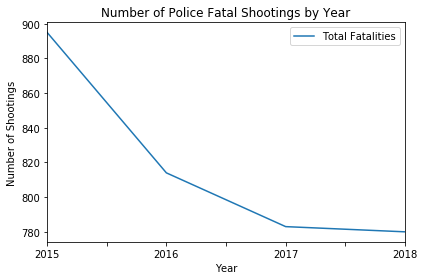

In [10]:
#number of fatalities in each year
count_chart = year_count.plot(title="Number of Police Fatal Shootings by Year")
count_chart.set_ylabel("Number of Shootings")
plt.tight_layout()
plt.show()

In [11]:
# mental_health = year_group['Sign of Mental Illness'].value_counts()
# mh_summary_table = pd.DataFrame({"Counts": mental_health})
# mh_summary_table

mental_health_total = df.loc[(df['Sign of Mental Illness'] == True )]
mental_health_total_count = mental_health_total["Year"].value_counts().to_frame()
mental_health_total_count = mental_health_total_count.reset_index()
mental_health_total_count = mental_health_total_count.set_index("index")
mental_health_total_count = mental_health_total_count.sort_index(ascending=True)
mental_health_total_count = mental_health_total_count.rename(columns={"Year": "Fatalities"})
mental_health_total_count


,Fatalities
index,
2015,239
2016,219
2017,208
2018,172


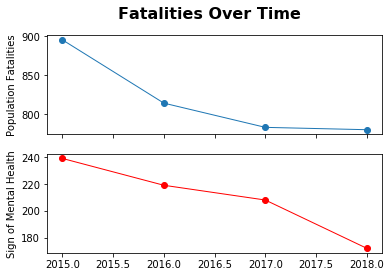

In [12]:
year=[2015, 2016, 2017, 2018]

fig, (mh_ax1, mh_ax2) = plt.subplots(2,1, sharex=True)
fig.suptitle("Fatalities Over Time", fontsize=16, fontweight="bold")

mh_ax1.plot(year, year_count, linewidth=1, marker="o")
mh_ax1.set_ylabel("Population Fatalities")

mh_ax2.plot(year, mental_health_total_count, linewidth=1, marker="o", color="r")
mh_ax2.set_ylabel("Sign of Mental Health")

plt.savefig("Sign_Mental_Health.png")
plt.show()


In [13]:
# t-test of mentally health population to all fatalities
stats.ttest_1samp(mental_health_total_count, year_count_mean)
#p-value <0.5, therefore the population of civilians showing signs of mental health to the population of the fatalities


Ttest_1sampResult(statistic=Total Fatalities   -43.308055
dtype: float64, pvalue=array([2.70976584e-05]))

In [14]:
#Total Civilians who did not flee but got shot
not_flee_total = df.loc[(df['Flee'] == 'Not fleeing' )]
not_flee_total_count = not_flee_total["Year"].value_counts().to_frame()
not_flee_total_count = not_flee_total_count.reset_index()
not_flee_total_count = not_flee_total_count.set_index("index")
not_flee_total_count = not_flee_total_count.sort_index(ascending=True)
not_flee_total_count = not_flee_total_count.rename(columns={"Year": "Not Flee Fatalities"})
not_flee_total_count
# list(not_flee_total_count)

,Not Flee Fatalities
index,
2015,662
2016,567
2017,527
2018,520


In [15]:
not_flee_mean = not_flee_total_count.mean()
print(not_flee_mean)
not_flee_sem = not_flee_total_count.sem()
print(not_flee_sem)

Not Flee Fatalities    569.0
dtype: float64
Not Flee Fatalities    32.682819
dtype: float64


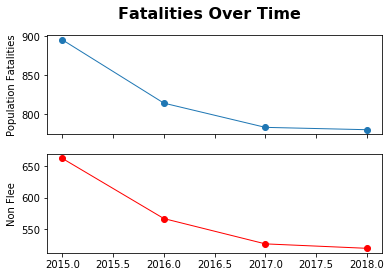

In [16]:
year=[2015, 2016, 2017, 2018]

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
fig.suptitle("Fatalities Over Time", fontsize=16, fontweight="bold")

ax1.plot(year, year_count, linewidth=1, marker="o")
ax1.set_ylabel("Population Fatalities")

ax2.plot(year, not_flee_total_count, linewidth=1, marker="o", color="r")
ax2.set_ylabel("Non Flee")

plt.savefig("Non_Flee.png")
plt.show()

In [17]:
# t-test of non-flee population to all fatalities
stats.ttest_1samp(not_flee_total_count, year_count_mean)

Ttest_1sampResult(statistic=Total Fatalities   -7.618682
dtype: float64, pvalue=array([0.00469387]))

In [18]:
#Total Civilians who did not flee, and are armed
not_flee_armed = df.loc[(df['Flee'] == 'Not fleeing' ) & (df["Armed"] !='unarmed')]
not_flee_armed_count = not_flee_armed["Year"].value_counts().to_frame()
not_flee_armed_count = not_flee_armed_count.rename(columns={"Year": "Armed Fatalities"})
not_flee_armed_count = not_flee_armed_count.reset_index()
not_flee_armed_count = not_flee_armed_count.set_index("index")
not_flee_armed_count = not_flee_armed_count.sort_index(ascending=True)

In [19]:
#Total Civilians who did not flee, and threaten with attack
not_flee_attack = df.loc[(df['Flee'] == 'Not fleeing' ) & (df["Threat"] == "attack")]
not_flee_attack_count = not_flee_attack["Year"].value_counts().to_frame()
not_flee_attack_count = not_flee_attack_count.reset_index()
not_flee_attack_count = not_flee_attack_count.set_index("index")
not_flee_attack_count = not_flee_attack_count.sort_index(ascending = True)
not_flee_attack_count = not_flee_attack_count.rename(columns={"Year": "Attacked Fatalities"})

In [20]:
#Total Civilians who did not flee, and show signs of mental illness
not_flee_mh = df.loc[(df['Flee'] == 'Not fleeing' ) & (df["Sign of Mental Illness"] == True)]
not_flee_mh_count = not_flee_mh["Year"].value_counts().to_frame()

not_flee_mh_count = not_flee_mh_count.reset_index()
not_flee_mh_count = not_flee_mh_count.set_index("index")
not_flee_mh_count = not_flee_mh_count.sort_index(ascending = True)
not_flee_mh_count = not_flee_mh_count.rename(columns={"Year": "Mental Health Fatalities"})

In [21]:
#Total Civilians who did not flee, and not wearing a body camera
not_flee_bc = df.loc[(df['Flee'] == 'Not fleeing' ) & (df["Body Camera"] == False)]
not_flee_bc_count = not_flee_bc["Year"].value_counts().to_frame()

not_flee_bc_count = not_flee_bc_count.reset_index()
not_flee_bc_count = not_flee_bc_count.set_index("index")
not_flee_bc_count = not_flee_bc_count.sort_index(ascending = True)
not_flee_bc_count = not_flee_bc_count.rename(columns={"Year": "No Body Camera Fatalities"})


In [22]:
#Total Civilians who did not flee, and race=W
not_flee_w = df.loc[(df['Flee'] == 'Not fleeing' ) & (df["Race"] == "W")]
not_flee_w_count = not_flee_w["Year"].value_counts().to_frame()

not_flee_w_count = not_flee_w_count.reset_index()
not_flee_w_count = not_flee_w_count.set_index("index")
not_flee_w_count = not_flee_w_count.sort_index(ascending = True)
not_flee_w_count = not_flee_w_count.rename(columns={"Year": "Race (W) Fatalities"})


In [23]:
#Total Civilians who did not flee, and race=B
not_flee_b = df.loc[(df['Flee'] == 'Not fleeing' ) & (df["Race"] == "B")]
not_flee_b_count = not_flee_b["Year"].value_counts().to_frame()

not_flee_b_count = not_flee_b_count.reset_index()
not_flee_b_count = not_flee_b_count.set_index("index")
not_flee_b_count = not_flee_b_count.sort_index(ascending = True)
not_flee_b_count = not_flee_b_count.rename(columns={"Year": "Race (B) Fatalities"})


In [24]:
# Create a DataFrame of not fleeing data 
not_flee_df = pd.concat([not_flee_total_count, not_flee_armed_count,not_flee_attack_count, not_flee_mh_count, not_flee_bc_count, not_flee_w_count, not_flee_b_count], axis=1)
not_flee_df

,Not Flee Fatalities,Armed Fatalities,Attacked Fatalities,Mental Health Fatalities,No Body Camera Fatalities,Race (W) Fatalities,Race (B) Fatalities
index,,,,,,,
2015,662,607,505,205,608,361,160
2016,567,540,323,196,483,312,129
2017,527,494,333,179,470,291,115
2018,520,496,326,145,459,289,121


In [25]:
not_flee_df = not_flee_df.reset_index()
not_flee_df


,index,Not Flee Fatalities,Armed Fatalities,Attacked Fatalities,Mental Health Fatalities,No Body Camera Fatalities,Race (W) Fatalities,Race (B) Fatalities
0,2015,662,607,505,205,608,361,160
1,2016,567,540,323,196,483,312,129
2,2017,527,494,333,179,470,291,115
3,2018,520,496,326,145,459,289,121


In [26]:
melted_df = not_flee_df.melt(id_vars=["index"], var_name = "Type", value_name = "Fatality Count")
melted_df

,index,Type,Fatality Count
0,2015,Not Flee Fatalities,662
1,2016,Not Flee Fatalities,567
2,2017,Not Flee Fatalities,527
3,2018,Not Flee Fatalities,520
4,2015,Armed Fatalities,607
5,2016,Armed Fatalities,540
6,2017,Armed Fatalities,494
7,2018,Armed Fatalities,496
8,2015,Attacked Fatalities,505
9,2016,Attacked Fatalities,323


In [27]:
# create numeric representations for each type 
# (Total Did not Flee = 1, Armed = 2, Attacked = 3, Mental Health = 4, No Body Cam = 5, Race (W) = 6, Race (B) = 7)
melted_df["Type Encoding"] = pd.factorize(melted_df['Type'])[0] + 1
melted_df

,index,Type,Fatality Count,Type Encoding
0,2015,Not Flee Fatalities,662,1
1,2016,Not Flee Fatalities,567,1
2,2017,Not Flee Fatalities,527,1
3,2018,Not Flee Fatalities,520,1
4,2015,Armed Fatalities,607,2
5,2016,Armed Fatalities,540,2
6,2017,Armed Fatalities,494,2
7,2018,Armed Fatalities,496,2
8,2015,Attacked Fatalities,505,3
9,2016,Attacked Fatalities,323,3


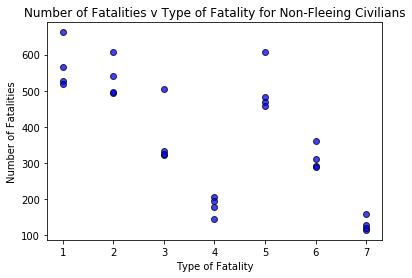

In [28]:
# scatter using “Type Encoding” for x and “Fatality Count” for y

plt.scatter(melted_df["Type Encoding"], melted_df["Fatality Count"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Number of Fatalities v Type of Fatality for Non-Fleeing Civilians")
plt.xlabel("Type of Fatality")
plt.ylabel("Number of Fatalities")

plt.savefig("Non_Flee_Scatter.png")
plt.show()


In [29]:
not_flee_describe =not_flee_df.describe()
not_flee_describe = not_flee_describe.rename(columns={"Total Fatalities":"Total", 
                                    "Not Flee Fatalities":"Not Flee Total", 
                                    "Armed Fatalities":"Armed", 
                                    "Attacked Fatalities": "Attacked", 
                                    "Mental Health Fatalities": "Mental Health",
                                    "No Body Camera Fatalities": "No Body Cam", 
                                    "Race (W) Fatalities":"Race (W)",
                                    "Race (B) Fatalities":"Race (B)"})

not_flee_describe

,Not Flee Total,Armed,Attacked,Mental Health,No Body Cam,Race (W),Race (B)
count,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000
mean,569.000000,534.250000,371.75000,181.250000,505.000000,313.250000,131.250000
std,65.365638,52.942579,88.93209,26.462237,69.363775,33.490048,20.006249
min,520.000000,494.000000,323.00000,145.000000,459.000000,289.000000,115.000000
25%,525.250000,495.500000,325.25000,170.500000,467.250000,290.500000,119.500000
50%,547.000000,518.000000,329.50000,187.500000,476.500000,301.500000,125.000000
75%,590.750000,556.750000,376.00000,198.250000,514.250000,324.250000,136.750000
max,662.000000,607.000000,505.00000,205.000000,608.000000,361.000000,160.000000


In [30]:
means = not_flee_describe.loc[["mean"], ["Total", "Not Flee Total", "Armed", "Attacked", "Mental Health", "No Body Cam", "Race (W)", "Race (B)"]]

means


,Total,Not Flee Total,Armed,Attacked,Mental Health,No Body Cam,Race (W),Race (B)
mean,NaN,569.0,534.25,371.75,181.25,505.0,313.25,131.25


In [31]:
not_flee_sem = not_flee_df.sem().to_frame()
not_flee_sem_list = not_flee_sem.loc[:, [0]]

not_flee_sem_list

,0
Not Flee Fatalities,32.682819
Armed Fatalities,26.471289
Attacked Fatalities,44.466045
Mental Health Fatalities,13.231119
No Body Camera Fatalities,34.681888
Race (W) Fatalities,16.745024
Race (B) Fatalities,10.003125


Text(0.5, 1.0, 'Fatality Error Plot')

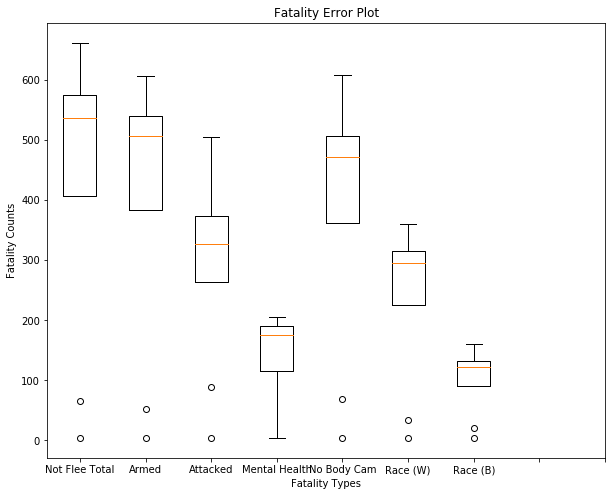

In [32]:
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plot_array = not_flee_describe.iloc[:,0:10].values
plt.boxplot(plot_array)
plt.xticks(range(1,10), not_flee_describe.columns[0:10])

pylab.xlabel('Fatality Types')
pylab.ylabel('Fatality Counts')
pylab.title('Fatality Error Plot')


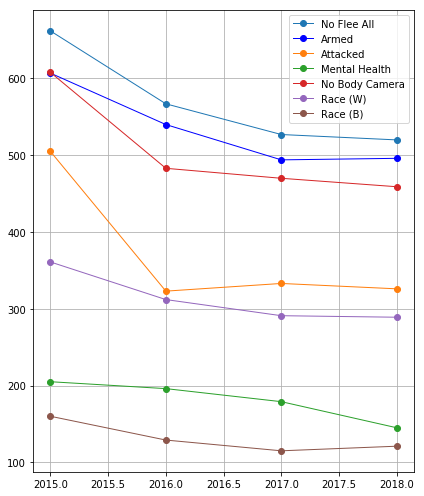

In [33]:
year=[2015, 2016, 2017, 2018]
plt.figure(figsize=(6,7))
no_flee = plt.plot(year, not_flee_total_count, linewidth=1, marker="o", label="No Flee All" )
no_flee_armed = plt.plot(year, not_flee_armed_count, linewidth=1, marker="o", color="b", label="Armed")
no_flee_attack = plt.plot(year, not_flee_attack_count, linewidth=1, marker="o", label = "Attacked")
no_flee_mh = plt.plot(year, not_flee_mh_count, linewidth=1, marker="o", label="Mental Health")
no_flee_bc = plt.plot(year, not_flee_bc_count, linewidth=1, marker="o", label="No Body Camera")
no_flee_w = plt.plot(year, not_flee_w_count, linewidth=1, marker="o", label="Race (W)")
no_flee_b = plt.plot(year, not_flee_b_count, linewidth=1, marker="o", label="Race (B)")

# Create a legend for our chart

plt.legend(loc="best")
plt.tight_layout()
plt.grid()
# Show the chart
plt.show()
